# Fast Fourier Transform
## DFT

The discrete Fourier transform of a vector $\mathbf{y} = \left(y_0,y_1,...,y_{N-1}\right)$ is given by:

\begin{equation}
c_k = \sum_{n=0}^{N-1} y_n exp\left(\frac{-2\pi ikn}{N}\right) = \sum_{n=0}^{N-1} y_n \left[ cos \left(\frac{2\pi kn}{N}\right)-i\, sin \left(\frac{2\pi kn}{N}\right)\right].
\end{equation}

I will implement the right-most expression above in my code to avoid complex exponential problems.

In [1]:
from fft_class import fourier as ft
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
%matplotlib inline

In [2]:
rnd.seed(0)
rnd.random()
step = 50
dvec = [rnd.random() for  i in range(step)]

vec = list()
time = 0.
N = 0
StepList = list()
TimeList = list()
print("Started Fourier Transforming")
while time < 1.:
    vec += dvec
    N = len(vec)
    f = ft(vec)
    dft = f.dft()
    time = f.t
    StepList.append(N)
    TimeList.append(time)
    print("N = ",N,"\tTime = ",f.t,"seconds")

Started Fourier Transforming
N =  50 	Time =  0.0068056583404541016 seconds
N =  100 	Time =  0.022176265716552734 seconds
N =  150 	Time =  0.04356098175048828 seconds
N =  200 	Time =  0.07633781433105469 seconds
N =  250 	Time =  0.12445688247680664 seconds
N =  300 	Time =  0.18130254745483398 seconds
N =  350 	Time =  0.23239374160766602 seconds
N =  400 	Time =  0.3054172992706299 seconds
N =  450 	Time =  0.383836030960083 seconds
N =  500 	Time =  0.46860575675964355 seconds
N =  550 	Time =  0.5637714862823486 seconds
N =  600 	Time =  0.6872076988220215 seconds
N =  650 	Time =  0.7873189449310303 seconds
N =  700 	Time =  0.9117879867553711 seconds
N =  750 	Time =  1.041214942932129 seconds


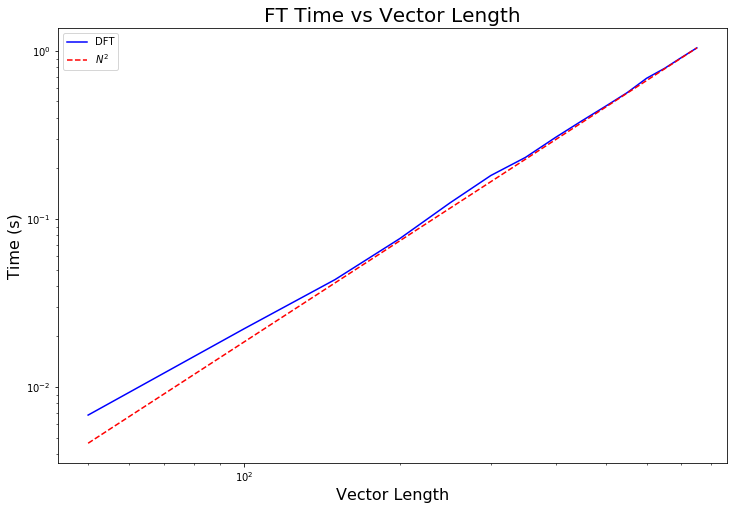

In [6]:
StepList = np.array(StepList)
fig,axes = plt.subplots(figsize=(12,8))
axes.loglog(StepList,TimeList,'b',label='DFT')
axes.loglog(StepList,(StepList**2)*(TimeList[-1]/(StepList[-1]**2)),'r--',label='$N^2$')
axes.legend()
axes.set_title("FT Time vs Vector Length",fontsize=20)
axes.set_xlabel("Vector Length",fontsize=16)
axes.set_ylabel("Time (s)",fontsize=16)